<a href="https://colab.research.google.com/github/nyaam2/aistudy/blob/main/%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%982.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install torchviz

Linear(in_features=1, out_features=1, bias=True)
Parameter containing:
tensor([[0.2318]], requires_grad=True)
Parameter containing:
tensor([0.8081], requires_grad=True)
tensor([1.0399], grad_fn=<ViewBackward0>)
tensor([1.0399], grad_fn=<AddBackward0>)


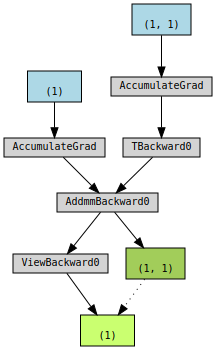

In [12]:
import torch
from torch import nn
from torchviz import make_dot

x=torch.tensor([1.])
model=nn.Linear(1,1)#입력 node  한 개, 출력 node 한 개인 layer 만
print(model)

print(model.weight) #만들면서 initialize
print(model.bias)

y=model(x)
print(y)

y2=x@model.weight+model.bias #식으로 나타내 본다면...
print(y2)
make_dot(y)

Parameter containing:
tensor([[ 0.6905],
        [-0.9214],
        [ 0.5286]], requires_grad=True)
Parameter containing:
tensor([-0.0864, -0.7295,  0.5149], requires_grad=True)
Parameter containing:
tensor([[-0.0456,  0.0895, -0.3965]], requires_grad=True)
Parameter containing:
tensor([-0.4642], requires_grad=True)
tensor([ 0.6041, -1.6509,  1.0435], grad_fn=<ViewBackward0>)
tensor([-1.0534], grad_fn=<ViewBackward0>)
tensor([-1.0534], grad_fn=<AddBackward0>)


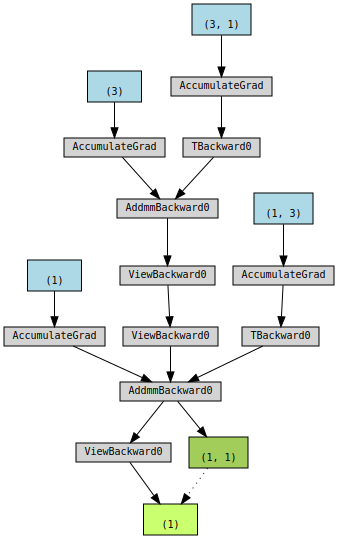

In [20]:
fc1=nn.Linear(1,3) #fully-connected
fc2=nn.Linear(3,1)

print(fc1.weight)
print(fc1.bias)
print(fc2.weight)
print(fc2.bias)

x=torch.tensor([1.])
x=fc1(x)
print(x)
y=fc2(x)
print(y)

x=torch.tensor([1.])
y2=(x@fc1.weight.T+fc1.bias)@fc2.weight.T+fc2.bias
print(y2)

make_dot(y)



tensor([-0.7335,  0.6547])
tensor([ 0.7458,  0.2720, -0.2895], grad_fn=<ViewBackward0>)


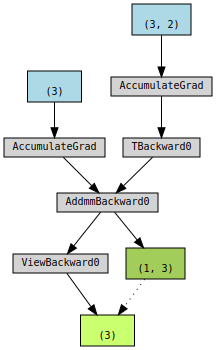

In [25]:
model=nn.Linear(2,3)
x=torch.randn(2)
print(x)
print(model(x))
#nn.Linear는 데이터의 shape의 마지막 차원이 '채'로(1D data) 들어오길 기대하는 녀석이다.
#(입력 노드 하나가 곧 하나의 채널(피쳐) 값을 의미)
#('채널'은 'TV 채널'의 '채널' 같이 특정 유형의 저오를 전달하는 통로. 즉, 피쳐(특징)와 의미적으로 거의 비슷함)
make_dot(model(x))

tensor([[ 0.0780,  0.8353],
        [-0.4428,  1.0791],
        [-1.0155, -1.6965],
        [-1.1048,  0.1703],
        [ 0.3373, -0.5218]])
tensor([[-0.3675,  0.9112,  0.1245],
        [-0.6599,  0.7966, -0.0040],
        [ 0.8516, -0.8397, -1.0948],
        [-0.2976,  0.0462, -0.5475],
        [ 0.5223,  0.3551, -0.1970]], grad_fn=<AddmmBackward0>)
torch.Size([4, 5, 3])
torch.Size([2, 3, 6, 4, 5, 3])


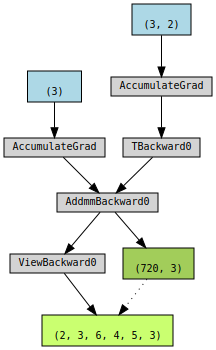

In [29]:
model=nn.Linear(2,3)
#따라서, 데이터 여러 개를 통과시키고 싶다면 개x채의 형태로 줘야 함('채x개'나 '개*채' 이런식으로 말)
x=torch.randn(5,2)

print(x)
print(model(x))

x=torch.randn(4,5,2)
print(model(x).shape)

#2개학교 3학년 6개의 반 4개의 조 각 조의 5사람의 키와 몸무게를 인공신경망에 통과시킬 때...
x=torch.randn(2,3,6,4,5,2)
print(model(x).shape)

make_dot(model(x))

tensor([-0.1704,  1.4931, -0.9057], grad_fn=<ViewBackward0>)
tensor([0.2050], grad_fn=<ViewBackward0>)
tensor([0.2050], grad_fn=<ViewBackward0>)


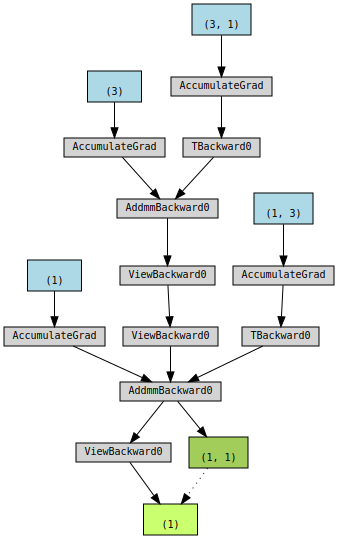

In [34]:
fc1=nn.Linear(1,3)
fc2=nn.Linear(3,1)

x=torch.tensor([1.])
x=fc1(x)
print(x)
x=fc2(x)
print(x)

model=nn.Sequential(fc1,fc2)
x=torch.tensor([1.])
print(model(x))

make_dot(model(x))

In [35]:
model=nn.Sequential(nn.Linear(2,5),
                    nn.Linear(5,10),
                    nn.Linear(10,3))
x=torch.randn(5,2)
print(x)
print(model(x))

tensor([[-0.4349, -0.8027],
        [ 0.3753,  0.9308],
        [ 0.1219, -0.0729],
        [ 1.0482,  0.3857],
        [ 1.2099, -1.1692]])
tensor([[ 0.1866,  0.2338, -0.0381],
        [-0.0593,  0.1071,  0.1822],
        [ 0.1014,  0.2039,  0.0292],
        [ 0.0966,  0.2479,  0.0037],
        [ 0.3923,  0.4582, -0.2986]], grad_fn=<AddmmBackward0>)


tensor([[0.4455, 0.5273, 0.5397],
        [0.4442, 0.5256, 0.5367],
        [0.4427, 0.5199, 0.5337],
        [0.4447, 0.5252, 0.5383],
        [0.4414, 0.5180, 0.5364]], grad_fn=<SigmoidBackward0>)


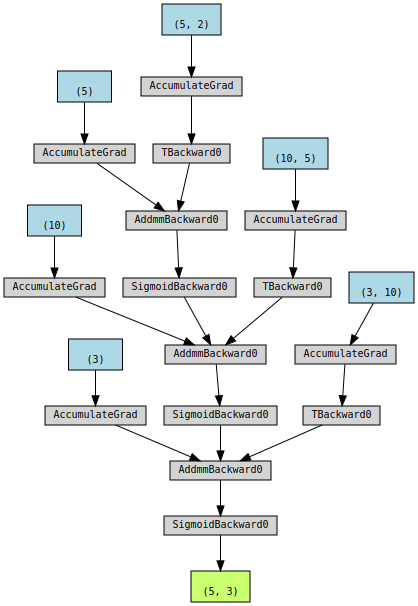

In [37]:
class MyModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.fc1=nn.Linear(2,5)
    self.fc2=nn.Linear(5,10)
    self.fc3=nn.Linear(10,3)
    self.act=nn.Sigmoid()

  def forward(self,x):
    x=self.fc1(x)
    x=self.act(x)
    x=self.fc2(x)
    x=self.act(x)
    x=self.fc3(x)
    x=self.act(x)
    return x

model=MyModel()
x=torch.randn(5,2)
y=model(x)
print(y)

make_dot(y)

In [39]:

class MyModel2(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear=nn.Sequential(nn.Linear(2,5),
                           nn.Sigmoid(),
                           nn.Linear(5,10),
                           nn.Sigmoid(),
                           nn.Linear(10,3),
                           nn.Sigmoid())
  def forward(self,x):
      x=self.linear(x)
      return x

model2=MyModel2()
x=torch.randn(5,2)
y=model2(x)
print(y)



tensor([[0.4652, 0.5494, 0.5915],
        [0.4653, 0.5514, 0.5877],
        [0.4667, 0.5493, 0.5899],
        [0.4656, 0.5500, 0.5898],
        [0.4645, 0.5518, 0.5879]], grad_fn=<SigmoidBackward0>)


In [42]:
print(model2)
print(model2.linear[0].weight)
print(model2.linear[-2].bias)

MyModel2(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=5, out_features=10, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=10, out_features=3, bias=True)
    (5): Sigmoid()
  )
)
Parameter containing:
tensor([[ 0.0998, -0.1297],
        [-0.1286, -0.5919],
        [-0.1142, -0.0508],
        [-0.2557, -0.1242],
        [-0.4081, -0.3574]], requires_grad=True)
Parameter containing:
tensor([2.9812e-01, 1.6828e-04, 2.7503e-01], requires_grad=True)


In [43]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.6388, -0.6513],
         [ 0.5268, -0.0606],
         [ 0.3713,  0.4735],
         [ 0.5081,  0.3408],
         [ 0.3920, -0.0977]], requires_grad=True),
 Parameter containing:
 tensor([-0.2106,  0.6776,  0.3717, -0.6145, -0.5601], requires_grad=True),
 Parameter containing:
 tensor([[-0.4302,  0.2576,  0.3014, -0.1571,  0.0428],
         [-0.1821,  0.2396, -0.1008,  0.0808, -0.0207],
         [-0.3651,  0.2063,  0.3286,  0.3059, -0.0385],
         [-0.1996,  0.2739,  0.2349, -0.3469, -0.1375],
         [-0.3213,  0.1161,  0.2884,  0.2834, -0.0203],
         [-0.1987,  0.0686, -0.2616,  0.1283,  0.1273],
         [ 0.1878, -0.3711,  0.0458, -0.3892,  0.3654],
         [ 0.1225,  0.1573, -0.2377,  0.0062, -0.2031],
         [-0.0654,  0.2978, -0.1142, -0.2497,  0.2267],
         [-0.0444, -0.2137,  0.4332,  0.3287, -0.1304]], requires_grad=True),
 Parameter containing:
 tensor([-0.2038, -0.2490, -0.1562, -0.2815, -0.1976,  0.3091,  0.0431,  0.3124,
  

In [44]:
#파라미터 수 구하기
num=sum([p.numel() for p in model.parameters() if p.requires_grad])
print(num)

108


인공신경망 학습 예제


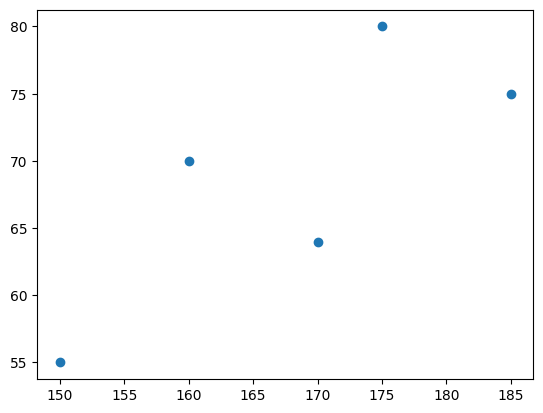

In [46]:
import matplotlib.pyplot as plt
x=torch.tensor([150,160,170,175,185.])
y=torch.tensor([55,70,64,80,75.])
N=len(x)
plt.plot(x,y,'o')

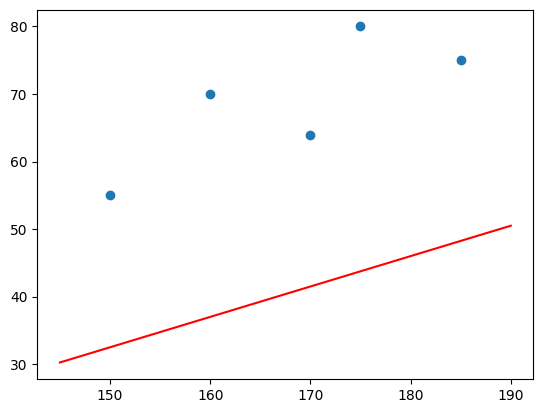

In [49]:
#초깃값 설정
a=0.45
b=-35
x_plot=torch.linspace(145,190,100)
y_plot=a*x_plot+b

plt.plot(x,y,'o')
plt.plot(x_plot,y_plot,'r')

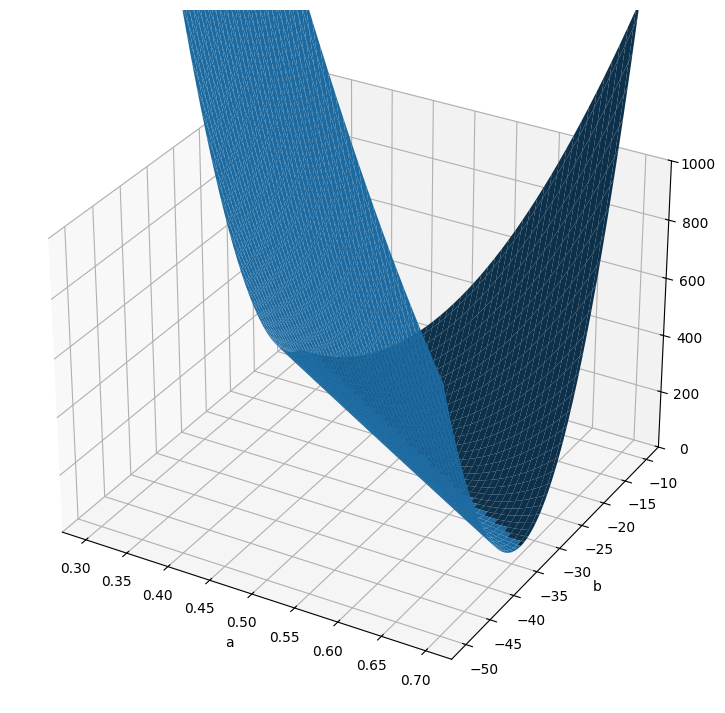

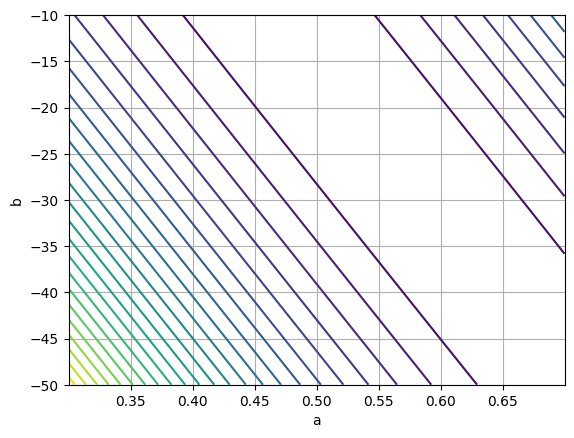

In [54]:
#a,b를 바꿔가면서 Loss 값을 일일히 구해서 가장 작아지게 하는 a,b를 선정

a=0.5+torch.linspace(-0.2,0.2,100)
b=-30+torch.linspace(-20,20,100)

L=torch.zeros(len(b),len(a))
for i in range(len(b)):
  for j in range(len(b)):
    for n in range(N):
      L[i,j]=L[i,j]+(y[n]-(a[j]*x[n]+b[i]))**2
L=L/N
plt.figure(figsize=[10,9])
ax=plt.axes(projection="3d")
A,B=torch.meshgrid(a,b)
ax.plot_surface(A,B,L);
ax.set_xlabel('a');ax.set_ylabel('b')
ax.set_zlim([0,1000])

plt.figure()
plt.contour(a,b,L,30)
plt.xlabel('a'); plt.ylabel('b');plt.grid()

In [55]:
print(torch.min(L))
a_opt=A[L==torch.min(L)]
b_opt=B[L==torch.min(L)]
print(f"optimal a= {a_opt}")
print(f"optimal b= {b_opt}")

tensor(29.0315)
optimal a= tensor([0.5424])
optimal b= tensor([-23.7374])


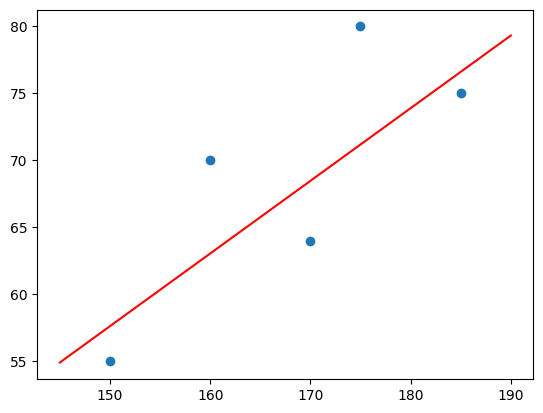

In [58]:
x_plot=torch.linspace(145,190,100)
y_plot=a_opt*x_plot+b_opt
plt.plot(x,y,'o')
plt.plot(x_plot,y_plot,'r')

Epoch: 1,train loss: 826.2250
wieght: 0.4785, Bias: -34.9998


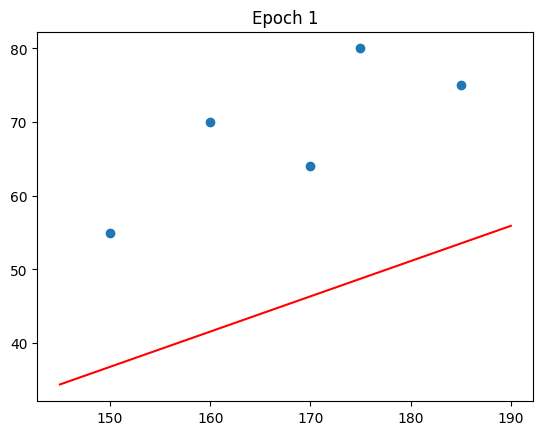

--------------------
Epoch: 2,train loss: 578.0414
wieght: 0.5022, Bias: -34.9997


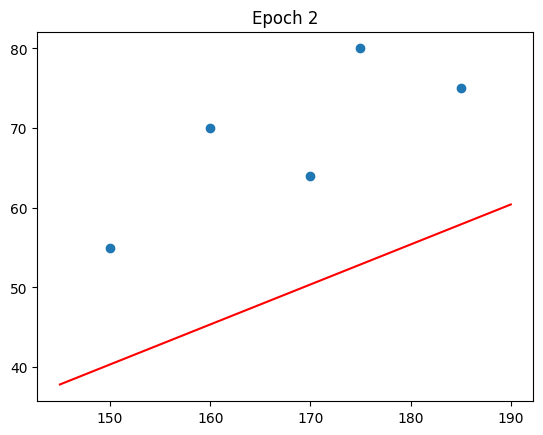

--------------------
Epoch: 3,train loss: 407.1602
wieght: 0.5218, Bias: -34.9996


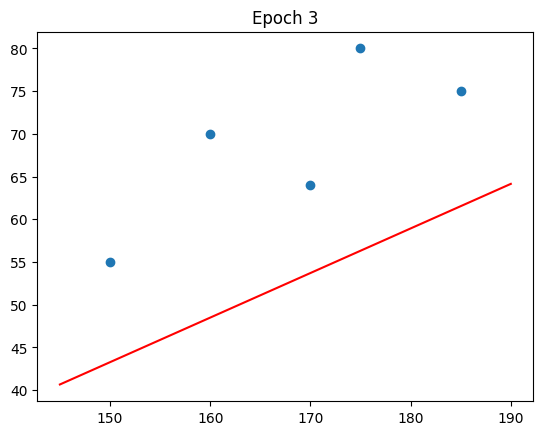

--------------------
Epoch: 4,train loss: 289.5042
wieght: 0.5381, Bias: -34.9995


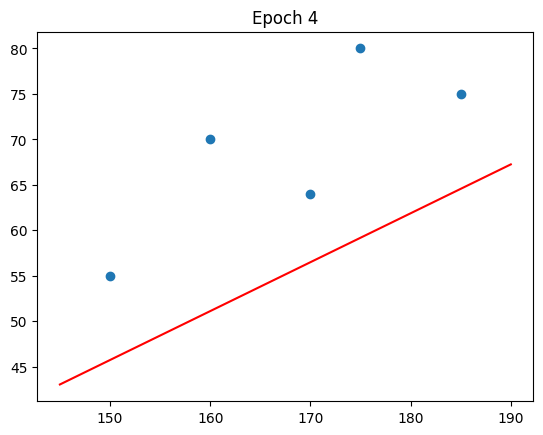

--------------------
Epoch: 5,train loss: 208.4954
wieght: 0.5517, Bias: -34.9994


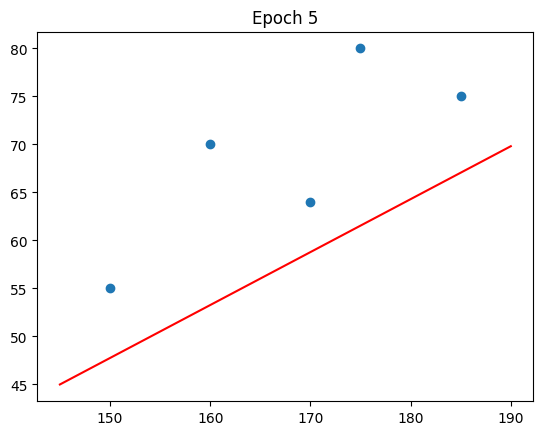

--------------------
Epoch: 6,train loss: 152.7187
wieght: 0.5629, Bias: -34.9993


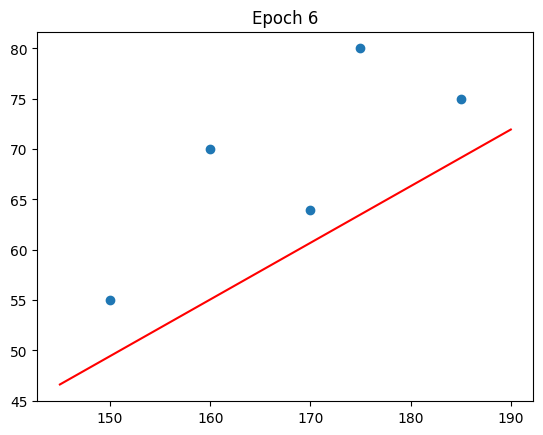

--------------------
Epoch: 7,train loss: 114.3153
wieght: 0.5722, Bias: -34.9993


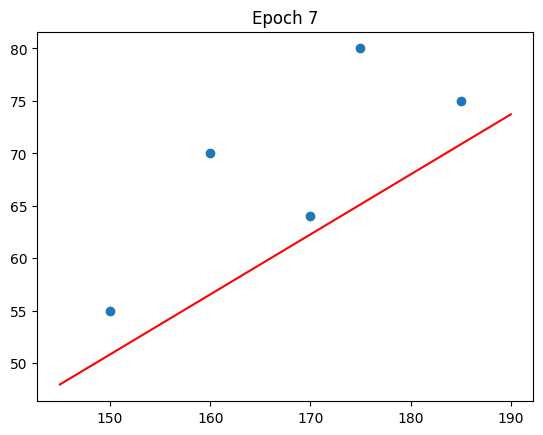

--------------------
Epoch: 8,train loss: 87.8735
wieght: 0.5799, Bias: -34.9992


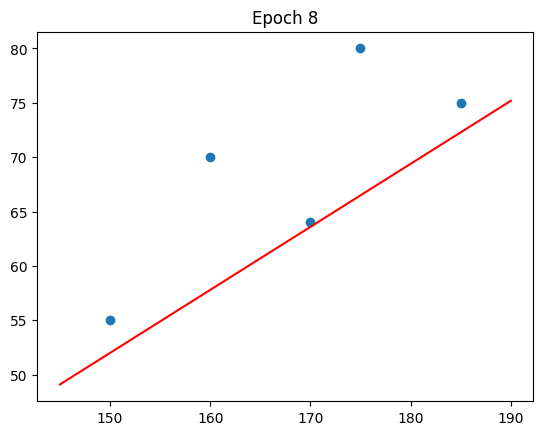

--------------------
Epoch: 9,train loss: 69.6676
wieght: 0.5863, Bias: -34.9992


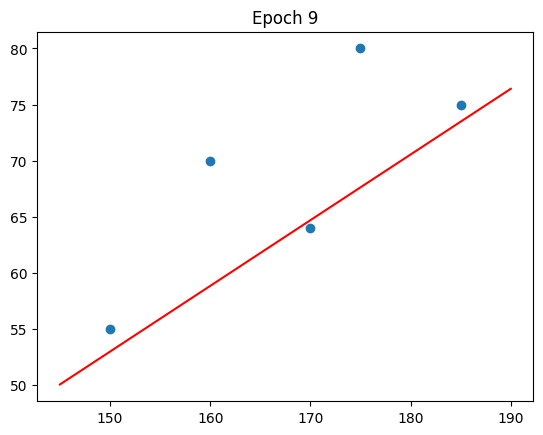

--------------------
Epoch: 10,train loss: 57.1324
wieght: 0.5917, Bias: -34.9992


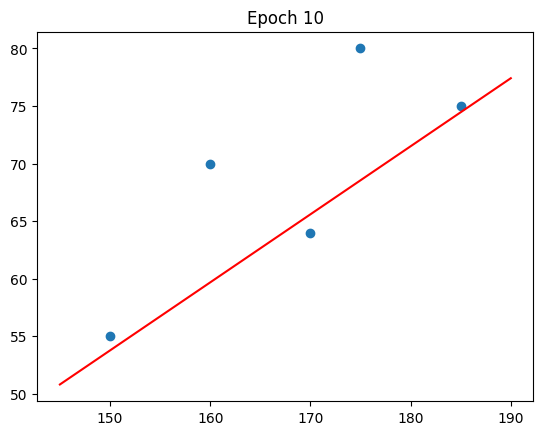

--------------------
Epoch: 11,train loss: 48.5017
wieght: 0.5961, Bias: -34.9991


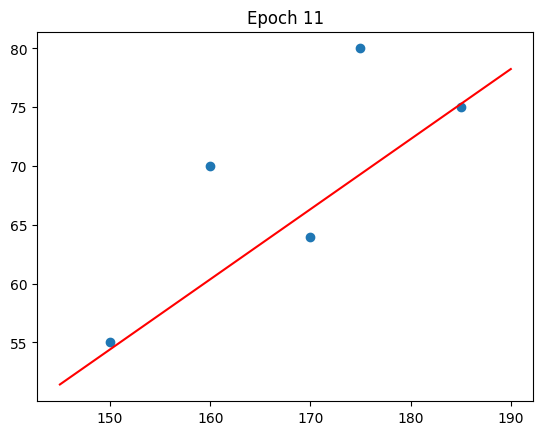

--------------------
Epoch: 12,train loss: 42.5591
wieght: 0.5997, Bias: -34.9991


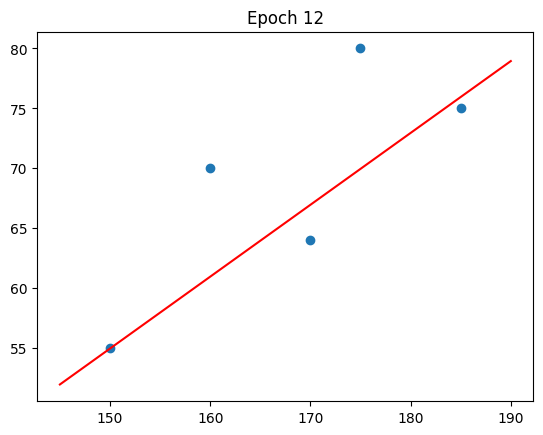

--------------------
Epoch: 13,train loss: 38.4676
wieght: 0.6028, Bias: -34.9991


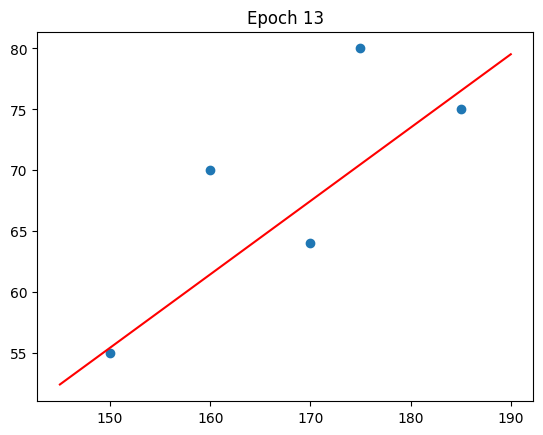

--------------------
Epoch: 14,train loss: 35.6504
wieght: 0.6053, Bias: -34.9991


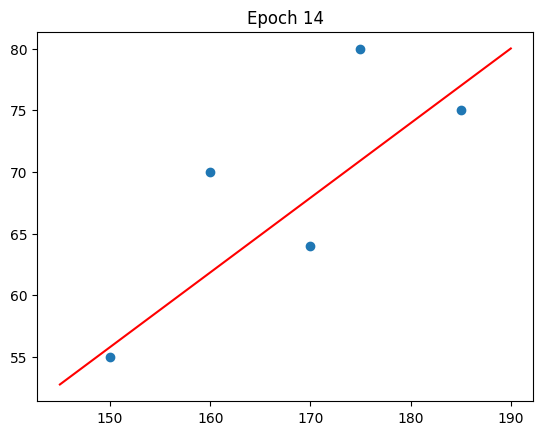

--------------------
Epoch: 15,train loss: 33.7107
wieght: 0.6074, Bias: -34.9991


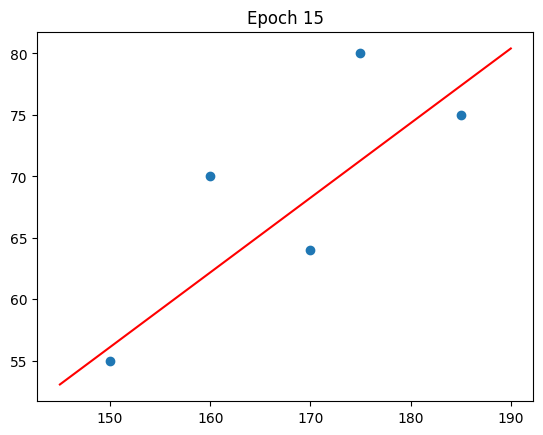

--------------------
Epoch: 16,train loss: 32.3752
wieght: 0.6091, Bias: -34.9991


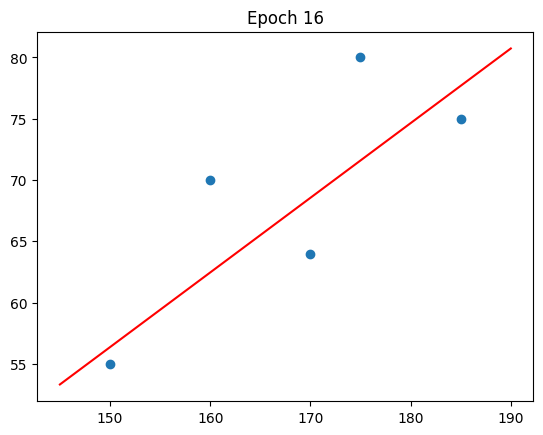

--------------------
Epoch: 17,train loss: 31.4557
wieght: 0.6106, Bias: -34.9990


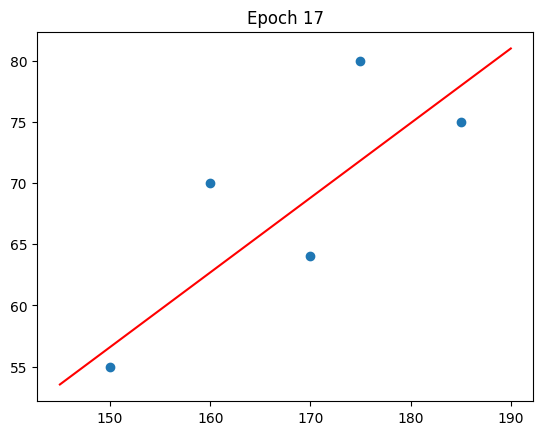

--------------------
Epoch: 18,train loss: 30.8226
wieght: 0.6118, Bias: -34.9990


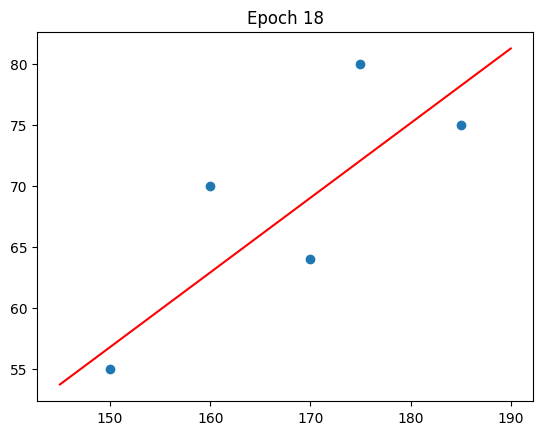

--------------------
Epoch: 19,train loss: 30.3866
wieght: 0.6127, Bias: -34.9990


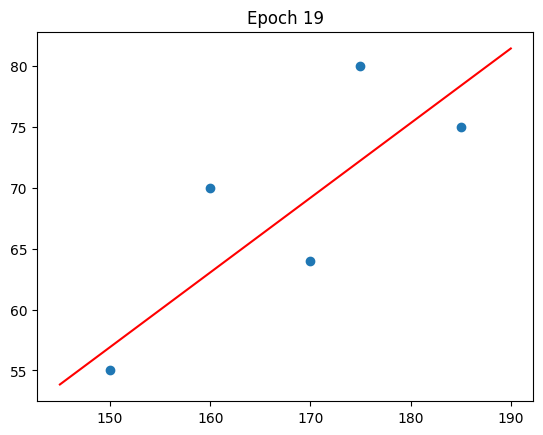

--------------------
Epoch: 20,train loss: 30.0865
wieght: 0.6136, Bias: -34.9990


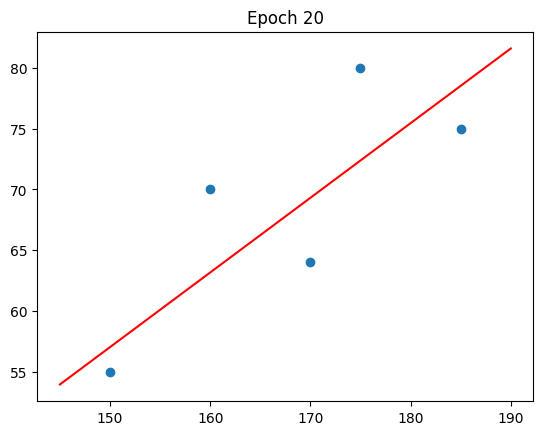

--------------------


In [62]:
#모델 파라미터 초기화
a=torch.tensor([0.45],requires_grad=True)
b=torch.tensor([-35.],requires_grad=True)

#하이퍼파라미터 설정
LR=3e-6
EPOCH=20

loss_history=[]

for ep in range(EPOCH):
  #inference
  y_hat=a*x+b
  #loss
  loss=0
  for n in range(N):
    loss+=(y[n]-y_hat[n])**2
  loss=loss/N #MSE
  #update
  loss.backward() #backpropagation
  with torch.no_grad():
    a-=LR*a.grad #weight update
    b-=LR*b.grad #weight update
  a.grad=torch.tensor([0.]) #gradient 초기화
  b.grad=torch.tensor([0.]) #gradient 초기화
  #print loss
  loss_history+=[loss.item()]
  print(f"Epoch: {ep+1},train loss: {loss.item():.4f}")
  #print weight and bias
  print(f"wieght: {a.item():.4f}, Bias: {b.item():.4f}")
  #plot graph
  x_plot=torch.linspace(145,190,100)
  y_plot=a.detach()*x_plot+b.detach()
  plt.figure()
  plt.plot(x,y,'o')
  plt.plot(x_plot,y_plot,'r')
  plt.title(f"Epoch {ep+1}")
  plt.show()

  print("-"*20)


In [63]:
#.gard 초기화 필요한 이유 실험
z=torch.tensor([1.],requires_grad=True)
for _ in range(2):
  loss=z**2
  loss.backward()
  print(z.grad)

tensor([2.])
tensor([4.])


Text(0.5, 1.0, 'Training Loss')

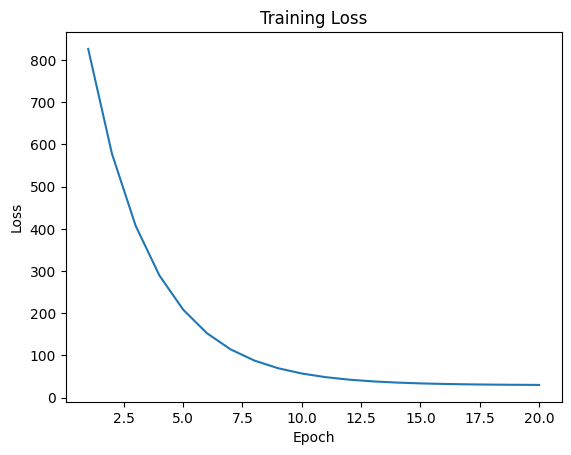

In [64]:
#plot loss_history
plt.plot(range(1,EPOCH+1),loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")

Epoch: 1,train loss: 900.5650
weight: 0.4780,Bias: -34.9998


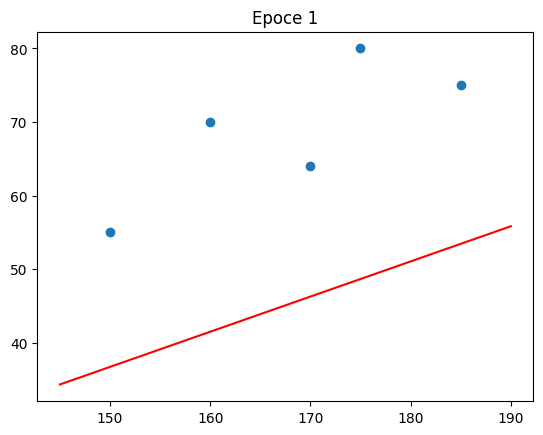

Epoch: 2,train loss: 660.9294
weight: 0.5013,Bias: -34.9997


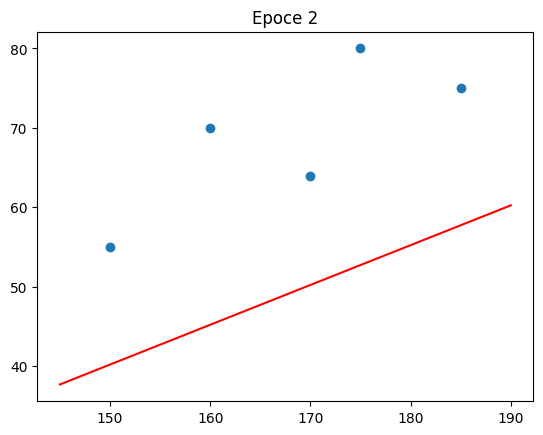

Epoch: 3,train loss: 495.9343
weight: 0.5206,Bias: -34.9996


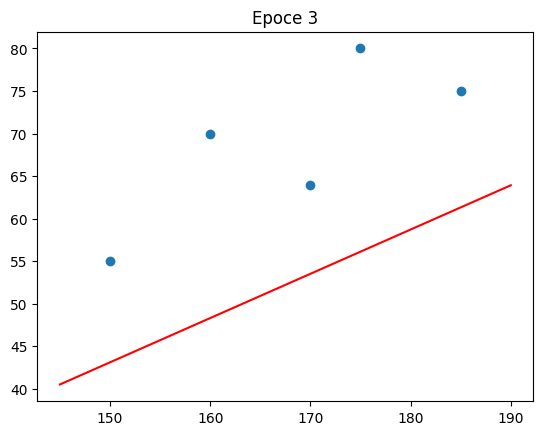

Epoch: 4,train loss: 382.3307
weight: 0.5366,Bias: -34.9995


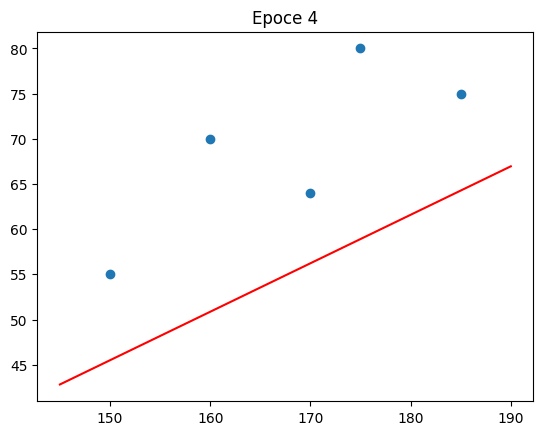

Epoch: 5,train loss: 304.1121
weight: 0.5499,Bias: -34.9994


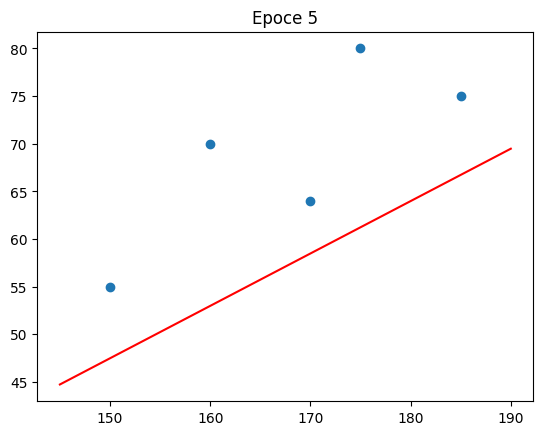

Epoch: 6,train loss: 250.2566
weight: 0.5609,Bias: -34.9993


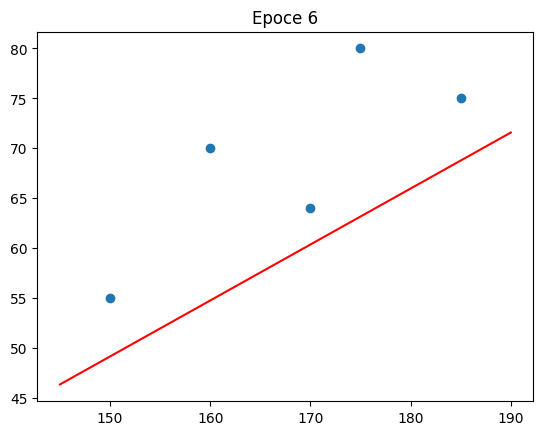

Epoch: 7,train loss: 213.1756
weight: 0.5701,Bias: -34.9993


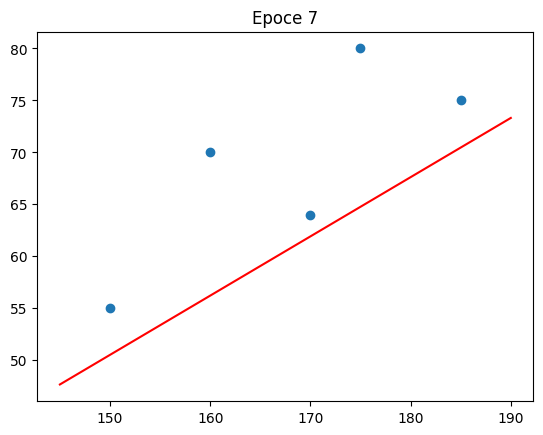

Epoch: 8,train loss: 187.6445
weight: 0.5777,Bias: -34.9992


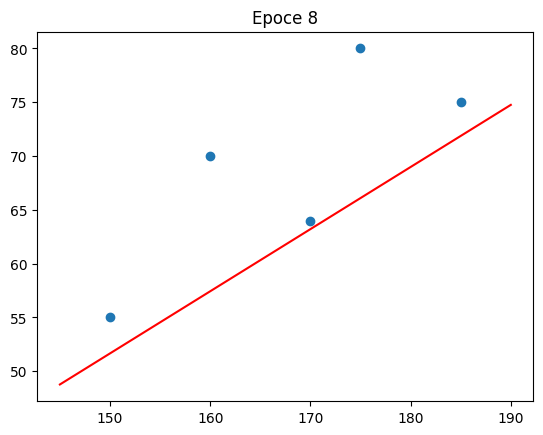

Epoch: 9,train loss: 170.0657
weight: 0.5840,Bias: -34.9992


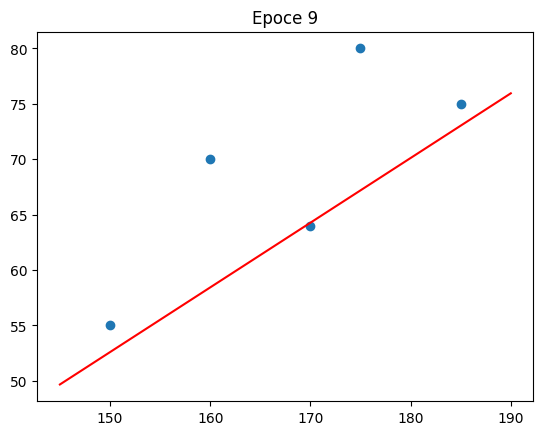

Epoch: 10,train loss: 157.9622
weight: 0.5892,Bias: -34.9991


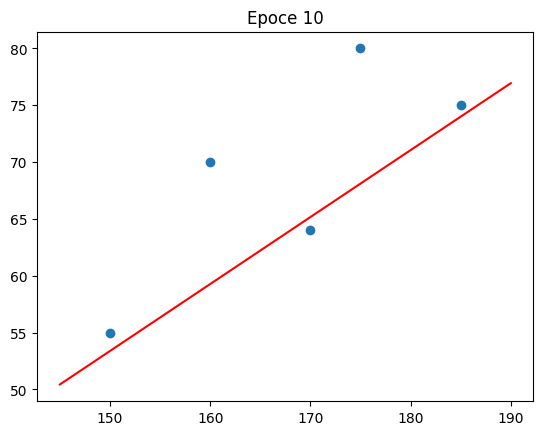

Epoch: 11,train loss: 149.6288
weight: 0.5935,Bias: -34.9991


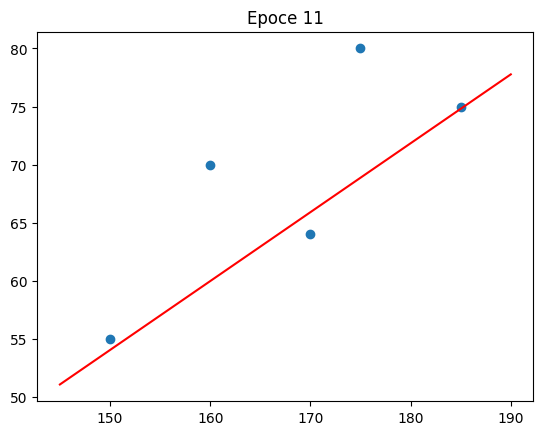

Epoch: 12,train loss: 143.8909
weight: 0.5971,Bias: -34.9991


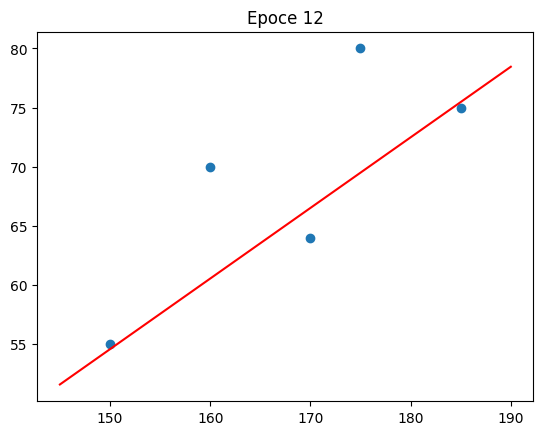

Epoch: 13,train loss: 139.9402
weight: 0.6001,Bias: -34.9991


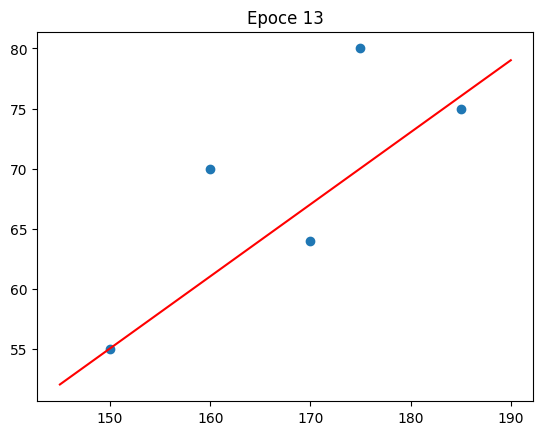

Epoch: 14,train loss: 137.2202
weight: 0.6026,Bias: -34.9991


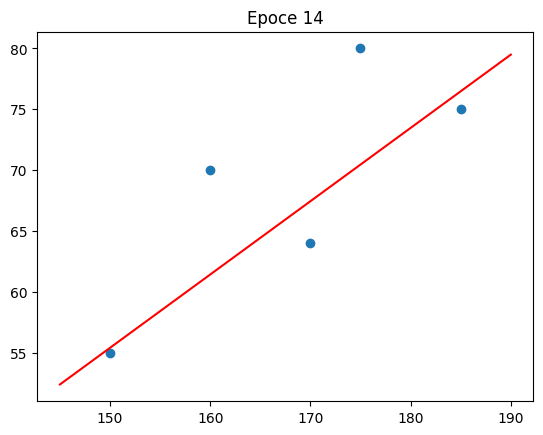

Epoch: 15,train loss: 135.3472
weight: 0.6046,Bias: -34.9990


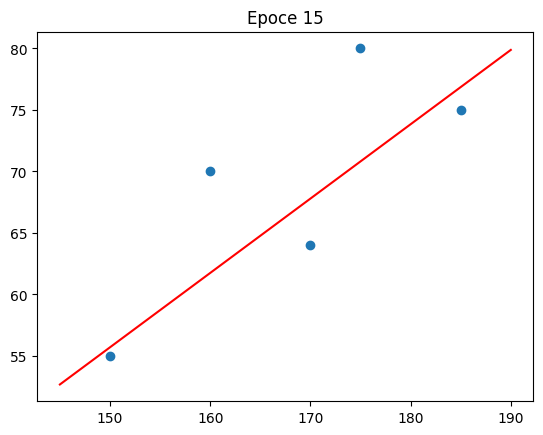

Epoch: 16,train loss: 134.0578
weight: 0.6064,Bias: -34.9990


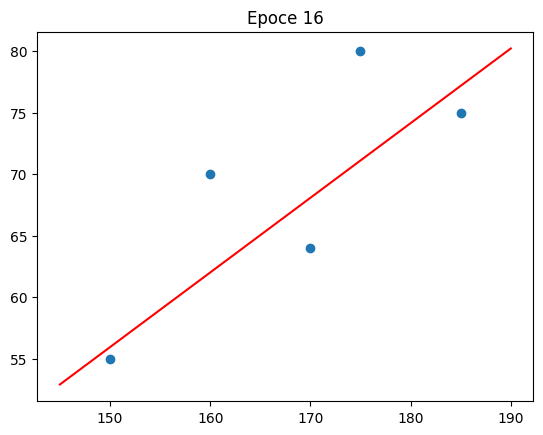

Epoch: 17,train loss: 133.1698
weight: 0.6078,Bias: -34.9990


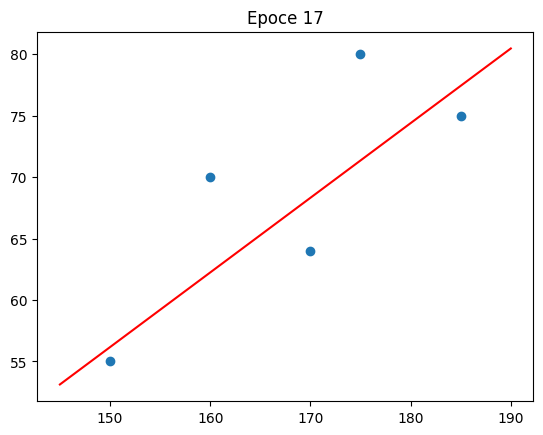

Epoch: 18,train loss: 132.5586
weight: 0.6089,Bias: -34.9990


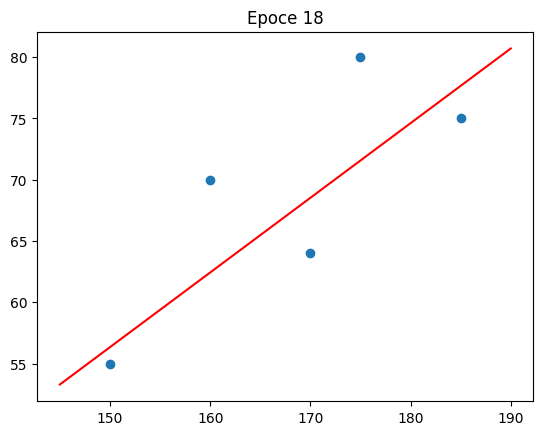

Epoch: 19,train loss: 132.1376
weight: 0.6099,Bias: -34.9990


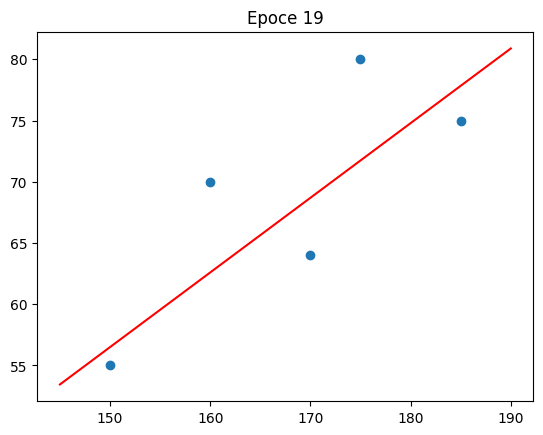

Epoch: 20,train loss: 131.8478
weight: 0.6107,Bias: -34.9990


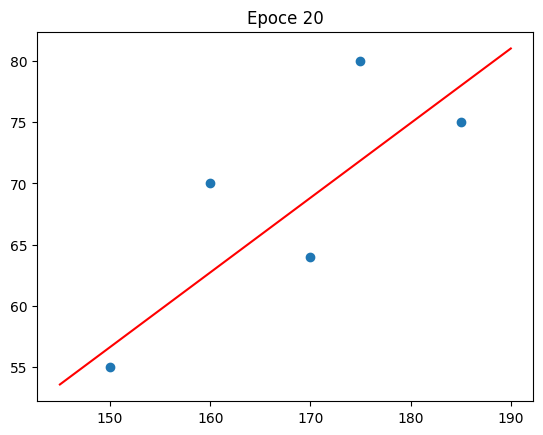

In [69]:
from torch import nn,optim
x=x.reshape(-1,1)

model=nn.Linear(1,1)
model.weight.data=torch.tensor([[0.45]])
model.bias.data=torch.tensor([-35.])

LR=3e-6
EPOCH=20
optimizer=optim.SGD(model.parameters(),lr=LR) #GD OR ADAM OR ...
criterion=nn.MSELoss() #Loss값 알아서 구해줌.

loss_history=[]

for ep in range(EPOCH):
  #inference
  y_hat=model(x)
  #loss
  loss=criterion(y_hat,y)
  #update
  optimizer.zero_grad() #gradient 누적을 막기 위한 초기화
  loss.backward() #backpropagation
  optimizer.step() #weight update
  #print loss
  loss_history+=[loss.item()]
  print(f"Epoch: {ep+1},train loss: {loss.item():.4f}")
  #print weight and bias
  print(f"weight: {model.weight.data.item():.4f},Bias: {model.bias.data.item():.4f}")
  x_plot=torch.linspace(145,190,100)
  y_plot=model.weight.squeeze().detach()*x_plot+model.bias.detach()
  plt.figure()
  plt.plot(x,y,'o')
  plt.plot(x_plot,y_plot,'r')
  plt.title(f"Epoce {ep+1}")
  plt.show()


Text(0.5, 1.0, 'Training Loss')

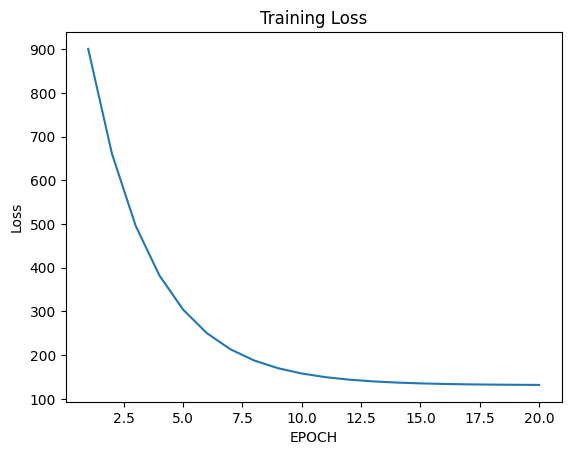

In [70]:
#plot loss_hisotry
plt.plot(range(1,EPOCH+1),loss_history)
plt.xlabel("EPOCH")
plt.ylabel("Loss")
plt.title("Training Loss")